### Analysis of an E-commerce Dataset

We have been provided with a combined e-commerce dataset. In this dataset, each user has the ability to post a rating and review for the products they purchased. Additionally, other users can evaluate the initial rating and review by expressing their trust or distrust.

This dataset includes a wealth of information for each user. Details such as their profile, ID, gender, city of birth, product ratings (on a scale of 1-5), reviews, and the prices of the products they purchased are all included. Moreover, for each product rating, we have information about the product name, ID, price, and category, the rating score, the timestamp of the rating and review, and the average helpfulness of the rating given by others (on a scale of 1-5).

The dataset is from several data sources, and we have merged all the data into a single CSV file named 'A Combined E-commerce Dataset.csv'. The structure of this dataset is represented in the header shown below.

| userId | gender | rating | review| item | category | helpfulness | timestamp | item_id | item_price | user_city|

    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |  ---- |  ---- |  
    
#### Description of Fields

* __userId__ - the user's id
* __gender__ - the user's gender
* __rating__ - the user's rating towards the item
* __review__ - the user's review towards the item
* __item__ - the item's name
* __category__ - the category of the item
* __helpfulness__ - the average helpfulness of this rating
* __timestamp__ - the timestamp when the rating is created
* __item_id__ - the item's id
* __item_price__ - the item's price
* __user_city__ - the city of user's birth

Note that, a user may rate multiple items and an item may receive ratings and reviews from multiple users. The "helpfulness" is an average value based on all the helpfulness values given by others.

There are four questions to explore with the data as shown below.



<img src="data-relation.png" align="left" width="400"/>


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


 #### Q1. Remove missing data

Please remove the following records in the csv file:

 * gender/rating/helpfulness is missing
 * review is 'none'

__Display the DataFrame, counting number of Null values in each column, and print the length of the data__ before and after removing the missing data.  

In [3]:
# your code and solutions
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
origin_df = pd.read_csv(r'D:\Users-data\47750731\Downloads/The E-commerce Dataset.csv')

origin_df.head()


,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4051,12807,Great job for what it is!,eBay,5.0,2.0,F,Online Stores & Services,88,149.00,39
1,4052,122899,Free Access Worth your Time,NetZero,5.0,0.0,F,Online Stores & Services,46,53.00,39
2,33,12700,AOL..I love you!!!!!!!!!!!!,AOL (America Online),5.0,4.0,F,Online Stores & Services,0,145.84,31
3,33,21000,EBAY!!! I LOVE YOU!!!! :-)*,eBay,5.0,4.0,F,Online Stores & Services,88,149.00,31
4,33,22300,Blair Witch...Oh Come On.......,Blair Witch Project,1.0,4.0,F,Movies,12,44.00,31


In [4]:
origin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   userId       20000 non-null  int64  
 1   timestamp    20000 non-null  int64  
 2   review       20000 non-null  object 
 3   item         20000 non-null  object 
 4   rating       19983 non-null  float64
 5   helpfulness  19978 non-null  float64
 6   gender       19973 non-null  object 
 7   category     20000 non-null  object 
 8   item_id      20000 non-null  int64  
 9   item_price   20000 non-null  float64
 10  user_city    20000 non-null  int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 1.7+ MB


In [27]:
#q1
print(origin_df.isnull().sum())
df_clean = origin_df.dropna(axis=0)
df_clean  = df_clean[df_clean.review != "none"]

print(df_clean.isnull().sum())
print(" Check for none comment")
print((df_clean.review == 'none').sum())

userId          0
timestamp       0
review          0
item            0
rating         17
helpfulness    22
gender         27
category        0
item_id         0
item_price      0
user_city       0
dtype: int64
userId         0
timestamp      0
review         0
item           0
rating         0
helpfulness    0
gender         0
category       0
item_id        0
item_price     0
user_city      0
dtype: int64
 Check for none comment
0


#### Q2. Descriptive statistics

With the cleaned data in Q1, please provide the data summarization as below:

* Q2.1 total number of unique users, unique reviews, unique items, and unique categories
* Q2.2 descriptive statistics, e.g., the total number, mean, std, min and max regarding all rating records
* Q2.3 descriptive statistics, e.g., mean, std, max, and min of the number of items rated by different genders
* Q2.4 descriptive statistics, e.g., mean, std, max, min of the number of ratings that received by each items


In [9]:
# your code and solutions
#q2.1
unique = df_clean.nunique(axis = 0)

print("The number of unique users" , unique.userId)
print("The number of unique reviews" , unique.review)
print("The number of unique categories" , unique.category)

print(unique)
df_clean.helpfulness.head()

The number of unique users 8562
The number of unique reviews 19459
The number of unique categories 9
userId          8562
timestamp       2283
review         19459
item              89
rating             5
helpfulness        5
gender             2
category           9
item_id           89
item_price        83
user_city         40
dtype: int64


0    2.0
1    0.0
2    4.0
3    4.0
4    4.0
Name: helpfulness, dtype: float64

In [10]:
#q2.2
df_clean.rating.describe()

count    19916.000000
mean         3.701798
std          1.404451
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64

In [11]:
#q2.3
df_clean.groupby('gender').rating.describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
F,9793.0,3.717451,1.395355,1.0,3.0,4.0,5.0,5.0
M,10123.0,3.686654,1.413098,1.0,3.0,4.0,5.0,5.0


In [12]:
#q2.4
df_clean.groupby('item').rating.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
AOL (America Online),939.0,2.500532,1.368528,1.0,1.00,2.0,4.0,5.0
All Advantage,657.0,3.412481,1.541706,1.0,2.00,4.0,5.0,5.0
Alta Vista (by 1stUp),157.0,3.541401,1.263341,1.0,3.00,4.0,4.0,5.0
Amazon.com,240.0,3.683333,1.571095,1.0,2.00,4.0,5.0,5.0
American Airlines,185.0,3.054054,1.417015,1.0,2.00,3.0,4.0,5.0
...,...,...,...,...,...,...,...,...
Wendy's,210.0,3.971429,1.093322,1.0,3.25,4.0,5.0,5.0
What Lies Beneath,160.0,3.450000,1.201676,1.0,3.00,3.5,4.0,5.0
X-Men,245.0,4.118367,0.853074,1.0,4.00,4.0,5.0,5.0


#### Q3. Plotting and Analysis

Please try to explore the correlation between gender/helpfulness/category and ratings; for instance, do female/male users tend to provide higher ratings than male/female users? Hint: you may use the boxplot function to plot figures for comparison (___Challenge___)
    
You may need to select the most suitable graphic forms for ease of presentation. Most importantly, for each figure or subfigure, please summarise ___what each plot shows___ (i.e. observations and explanations). Finally, you may need to provide an overall summary of the data.

In [13]:
#q3

df_clean.nunique(axis = 0)


userId          8562
timestamp       2283
review         19459
item              89
rating             5
helpfulness        5
gender             2
category           9
item_id           89
item_price        83
user_city         40
dtype: int64

these are all the

In [14]:
# your code and solutions
#q3
import seaborn as sns
import matplotlib.pyplot as plt
df_viz = df_clean.filter(["helpfulness", "rating", "gender", "category"])


In [15]:
import matplotlib.pyplot as plt

In [24]:
df_viz['rating'] = df_viz['rating'].astype('int64')


In [17]:
df_viz.category.unique()

array(['Online Stores & Services', 'Movies', 'Restaurants & Gourmet',
       'Personal Finance', 'Kids & Family', 'Hotels & Travel', 'Media',
       'Games', 'Books'], dtype=object)

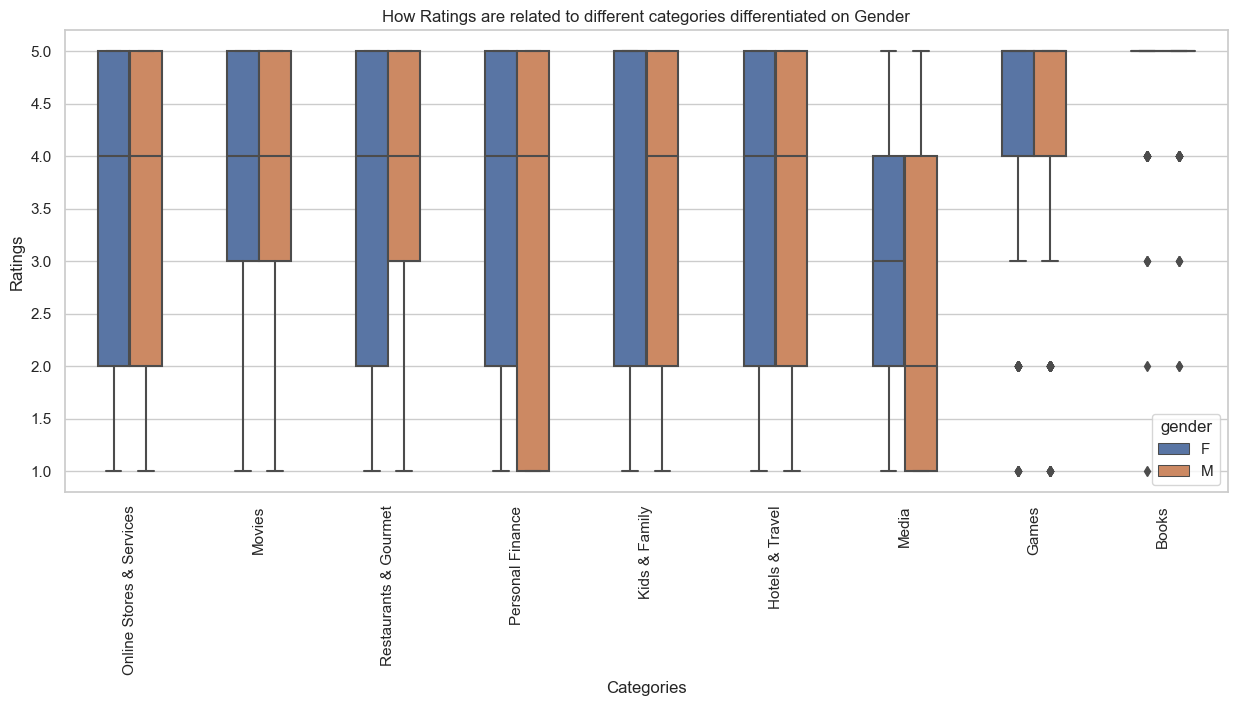

In [21]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 6))
ax = sns.boxplot(data = df_viz, x = "category", y = "rating", hue = "gender", width = 0.5, dodge = True)

# Set x-labels
#x_labels = list( ['Online', 'Movie', 'Restra', 'Persn Finance', 'Kids', 'Hotel&Travel', 'Media', 'Games', 'Books'])
#ax.set_xticklabels(x_labels)

# Set plot title and labels
plt.title("How Ratings are related to different categories differentiated on Gender")
plt.xlabel("Categories")
plt.ylabel("Ratings")
plt.xticks(rotation=90)

plt.show()

The Graph shows rating on different categories which is further differentiated upon Gender.


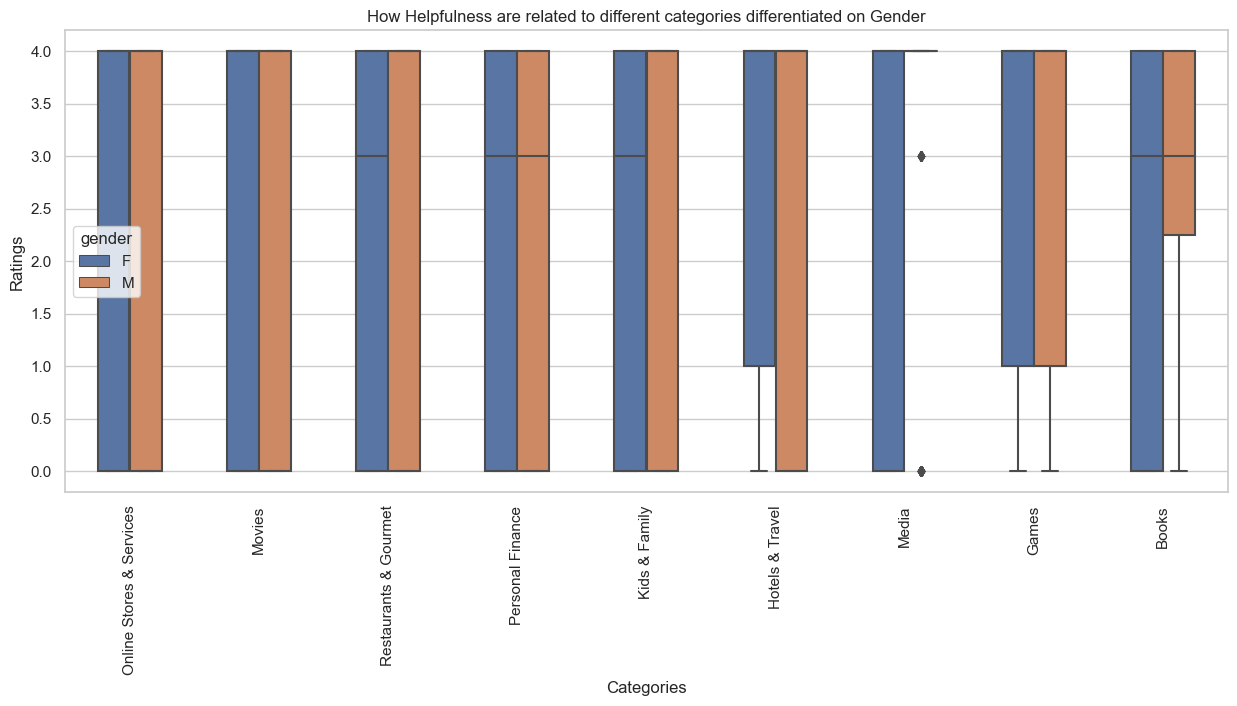

In [20]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 6))
ax = sns.boxplot(data = df_viz, x = "category", y = "helpfulness", hue = "gender", width = 0.5, dodge = True)

# Set x-labels
#x_labels = list( ['Online', 'Movie', 'Restra', 'Persn Finance', 'Kids', 'Hotel&Travel', 'Media', 'Games', 'Books'])
#ax.set_xticklabels(x_labels)

# Set plot title and labels
plt.title("How Helpfulness are related to different categories differentiated on Gender")
plt.xlabel("Categories")
plt.ylabel("Ratings")
plt.xticks(rotation=90)

plt.show()

In [22]:
df_viz.category.unique()

array(['Online Stores & Services', 'Movies', 'Restaurants & Gourmet',
       'Personal Finance', 'Kids & Family', 'Hotels & Travel', 'Media',
       'Games', 'Books'], dtype=object)

In [25]:
df_viz.info()
df_viz.corr()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19916 entries, 0 to 19999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   helpfulness  19916 non-null  float64
 1   rating       19916 non-null  int64  
 2   gender       19916 non-null  object 
 3   category     19916 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 778.0+ KB


C:\Users\47750731\AppData\Local\Temp\ipykernel_2084\3663044320.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_viz.corr()


,helpfulness,rating
helpfulness,1.000000,-0.000319
rating,-0.000319,1.000000


C:\Users\47750731\AppData\Local\Temp\ipykernel_2084\2188047789.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_viz.corr(), annot = True)


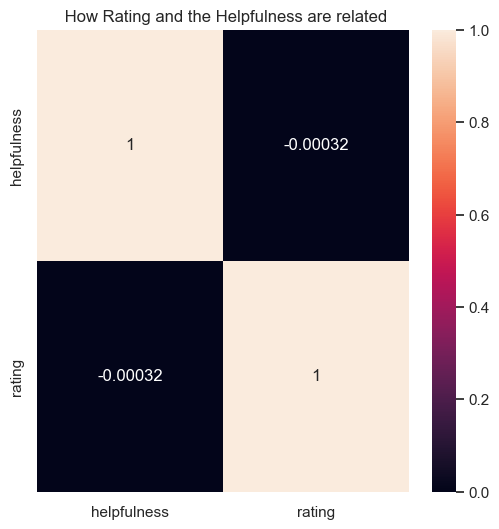

In [26]:
sns.set(style="whitegrid")
plt.figure(figsize=(6, 6))
sns.heatmap(df_viz.corr(), annot = True)

# Set x-labels
#x_labels = list( ['Online', 'Movie', 'Restra', 'Persn Finance', 'Kids', 'Hotel&Travel', 'Media', 'Games', 'Books'])
#ax.set_xticklabels(x_labels)

# Set plot title and labels
plt.title(" How Rating and the Helpfulness are related")
plt.show()

In [ ]:
df_viz.category.unique()

array(['Online Stores & Services', 'Movies', 'Restaurants & Gourmet',
       'Personal Finance', 'Kids & Family', 'Hotels & Travel', 'Media',
       'Games', 'Books'], dtype=object)

In [ ]:
df_viz.category.unique()

array(['Online Stores & Services', 'Movies', 'Restaurants & Gourmet',
       'Personal Finance', 'Kids & Family', 'Hotels & Travel', 'Media',
       'Games', 'Books'], dtype=object)

#### Q4. Detect and remove outliers

We may define outlier users, reviews and items with three rules (if a record meets one of the rules, it is regarded as an outlier):

* reviews of which the helpfulness is no more than 2
* users who rate less than 7 items
* items that receives less than 11 ratings

Please remove the corresponding records in the csv file that involves outlier users, reviews and items. After that, __print the length of the data__.

In [ ]:
df_remove = df_clean
df_remove1 = df_remove[(df_remove.helpfulness > 2) ]
df_remove1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13643 entries, 2 to 19997
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   userId       13643 non-null  int64  
 1   timestamp    13643 non-null  int64  
 2   review       13643 non-null  object 
 3   item         13643 non-null  object 
 4   rating       13643 non-null  float64
 5   helpfulness  13643 non-null  float64
 6   gender       13643 non-null  object 
 7   category     13643 non-null  object 
 8   item_id      13643 non-null  int64  
 9   item_price   13643 non-null  float64
 10  user_city    13643 non-null  int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 1.2+ MB


In [ ]:
bufferdf = df_remove1.groupby(['userId']).count()

bufferdf = bufferdf.loc[bufferdf.item_id >= 7]
okuser = bufferdf.index.values
df_remove2 = df_remove1[df_remove1["userId"].isin(okuser)]
df_remove2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2741 entries, 78 to 19990
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   userId       2741 non-null   int64  
 1   timestamp    2741 non-null   int64  
 2   review       2741 non-null   object 
 3   item         2741 non-null   object 
 4   rating       2741 non-null   float64
 5   helpfulness  2741 non-null   float64
 6   gender       2741 non-null   object 
 7   category     2741 non-null   object 
 8   item_id      2741 non-null   int64  
 9   item_price   2741 non-null   float64
 10  user_city    2741 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 257.0+ KB


In [ ]:
bufferdf2 = df_remove2.groupby(['item_id']).count()
bufferdf2 = bufferdf2.loc[bufferdf2.rating >= 11]
okitem = bufferdf2.index.values
df_remove3 = df_remove2[df_remove2["item_id"].isin(okitem)]
df_remove3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2685 entries, 78 to 19990
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   userId       2685 non-null   int64  
 1   timestamp    2685 non-null   int64  
 2   review       2685 non-null   object 
 3   item         2685 non-null   object 
 4   rating       2685 non-null   float64
 5   helpfulness  2685 non-null   float64
 6   gender       2685 non-null   object 
 7   category     2685 non-null   object 
 8   item_id      2685 non-null   int64  
 9   item_price   2685 non-null   float64
 10  user_city    2685 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 251.7+ KB
